# VIX strategies #

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import io
import os
import tradingWithPython as twp
from tradingWithPython import sharpe # general trading toolbox functions
from tradingWithPython import cboe_ckc as ckc
import pandas as pd # pandas time series library
from datetime import datetime
import quandl
quandl.ApiConfig.api_key = 'wxychbrgu7o7x3MRq4Hx'

C:\Users\chekitsch\Anaconda3\lib\site-packages\tradingWithPython\lib\cboe.py:11: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [53]:
# read CSV from local drive
path2 = r'C:\Users\chekitsch\Documents\Trading\Historical data\VIX\term_structure.csv'
vixfut = pd.read_csv(path2, index_col=0, header = 0, parse_dates=True)

In [55]:
# update VIX futures prices
vixfut = ckc.updateVixData(path2, vixfut)

len(vixfut)

VIX futures data is up to date as of  2017-05-12


3307

In [47]:
# get etf prices from Quandl
sDate = datetime(2011, 10, 4)

try:
    xiv = quandl.get('EOD/XIV', start_date=sDate.date().isoformat())
    uvxy = quandl.get('EOD/UVXY', start_date=sDate.date().isoformat())
    tqqq = quandl.get('EOD/TQQQ', start_date=sDate.date().isoformat())
except Exception as e:
    print (e)

In [109]:
etf = pd.concat([xiv.Adj_Open.rename('XIV'), uvxy.Adj_Open.rename('UVXY'), tqqq.Adj_Open.rename('TQQQ')], axis=1)
#etf = pd.concat([xiv.Adj_Close.rename('XIV'), uvxy.Adj_Close.rename('UVXY'), tqqq.Adj_Close.rename('TQQQ')], axis=1)
etf

,XIV,UVXY,TQQQ
Date,,,
2011-10-04,4.990,1.223100e+07,6.604638
2011-10-05,5.530,9.951000e+06,7.181888
2011-10-06,5.700,9.129000e+06,7.771633
2011-10-07,5.930,8.598000e+06,8.157715
2011-10-10,5.950,8.340000e+06,8.421351
2011-10-11,6.060,7.914000e+06,8.773698
2011-10-12,6.420,7.029000e+06,9.292224
2011-10-13,6.560,6.714000e+06,9.113551
2011-10-14,6.920,5.916000e+06,9.772016


In [56]:
# enrich VIX data
ratio_v_v1 = vixfut.VIX / vixfut.UX1
ratio_v1_v2 = vixfut.UX1 / vixfut.UX2
vixfut['ratio_contango'] = (0.7 * ratio_v_v1 + 0.3 * ratio_v1_v2) - 1
vixfut['ratio_vv'] = vixfut['VIX'] / vixfut['VXV']
vixfut['ratio_pct_chg'] = vixfut.VIX.pct_change()

# conform vixfut to etf.index
vixfut = vixfut.reindex(etf.index)

In [61]:
vixfut

,VIX,UX1,UX2,UX3,UX4,UX5,UX6,UX7,UX8,VXV,ratio_contango,ratio_vv,ratio_pct_chg
Date,,,,,,,,,,,,,
2011-10-04,40.82,40.800,38.100,35.200,35.850,34.650,33.950,33.900,33.500,40.45,0.021603,1.009147,-0.101870
2011-10-05,37.81,38.450,36.300,34.100,35.100,34.350,33.900,33.950,33.350,38.31,0.006117,0.986949,-0.073738
2011-10-06,36.27,37.850,35.900,33.750,34.750,34.000,33.500,33.600,33.250,37.04,-0.012925,0.979212,-0.040730
2011-10-07,36.20,37.950,35.950,33.850,34.900,34.200,33.850,33.850,33.400,37.31,-0.015589,0.970249,-0.001930
2011-10-10,33.02,34.700,33.650,32.100,33.050,32.650,32.450,32.600,32.250,34.79,-0.024529,0.949123,-0.087845
2011-10-11,32.86,34.500,33.500,32.050,33.000,32.550,32.350,32.600,32.200,34.06,-0.024320,0.964768,-0.004846
2011-10-12,31.26,32.250,31.450,30.550,31.650,31.350,31.300,31.550,31.200,32.97,-0.013857,0.948135,-0.048691
2011-10-13,30.70,32.100,31.200,30.300,31.500,31.300,31.250,31.600,31.100,32.71,-0.021876,0.938551,-0.017914
2011-10-14,28.24,29.750,29.350,28.900,30.350,30.150,30.200,30.450,30.300,30.39,-0.031441,0.929253,-0.080130


## Rewrite code above in function form: ##

In [229]:
def vixEtfStrategy(etfPrice, vixfut):
    pos = pd.DataFrame(index = vixfut.index) # initiate position dataframe
    pos['XIV'] = 0
    pos['UVXY'] = 0
    pos['TQQQ'] = 0

    #pos['XIV'][(vixfut['ratio_contango'] < -0.046) | (vixfut['ratio_vv'] <= 0.8) | (vixfut['ratio_pct_chg'] <= -0.1)] = 1
    #pos['UVXY'][((vixfut['ratio_contango'] > 0.055) | (vixfut['ratio_vv'] >= 1.0) | (vixfut['ratio_pct_chg'] >= 0.1)) & (pos['XIV'] != 1)] = 1
    pos['XIV'][(vixfut['ratio_contango'] < -0.046) | (vixfut['ratio_vv'] <= 0.8) | (vixfut['ratio_pct_chg'] <= -0.1) | (vixfut.VIX > 19.8)] = 1
    pos['UVXY'][((vixfut['ratio_contango'] > 0.055) | (vixfut['ratio_vv'] >= 1.0) | (vixfut['ratio_pct_chg'] >= 0.1) | (vixfut.VIX < 14.1)) & (pos['XIV'] != 1)] = 1

    pos['TQQQ'][(pos['UVXY'] == 0) & (pos['XIV'] == 0)] = 1
    #pos = pos.shift(2)  # shift signal forward 2 days ---> act on T-1 signal, need T+1 price for return
    print (" XIV {0} days, UVXY {1} days, TQQQ {2} days out of {3} days".format(len(pos[pos.XIV>0]), len(pos[pos.UVXY>0]), len(pos[pos.TQQQ>0]), len(pos)))
    
    R = etfPrice.pct_change()
    R = R.shift(-2) # shift return backward 2 days ---> act on T-1 signal, need T+1 price for return
    
    pnl = pd.DataFrame(index = pos.index) # initiate pnl dataframe
    pnl['XIV_BH'] = (R.XIV) # XIV buy and hold
    pnl['XIV'] = (R.XIV * pos.XIV)
    pnl['UVXY'] = (R.UVXY * pos.UVXY)
    pnl['TQQQ'] = (R.TQQQ * pos.TQQQ)
    pnl['Hybrid'] = pnl.XIV + pnl.UVXY + pnl.TQQQ

    return pnl, pos, R

In [230]:
pnl, pos, R = vixEtfStrategy(etf, vixfut)

 XIV 1085 days, UVXY 111 days, TQQQ 215 days out of 1411 days


Sharpe: 
 XIV_BH    1.062963
XIV       1.211679
UVXY      0.865975
TQQQ      1.831440
Hybrid    1.815298
dtype: float64


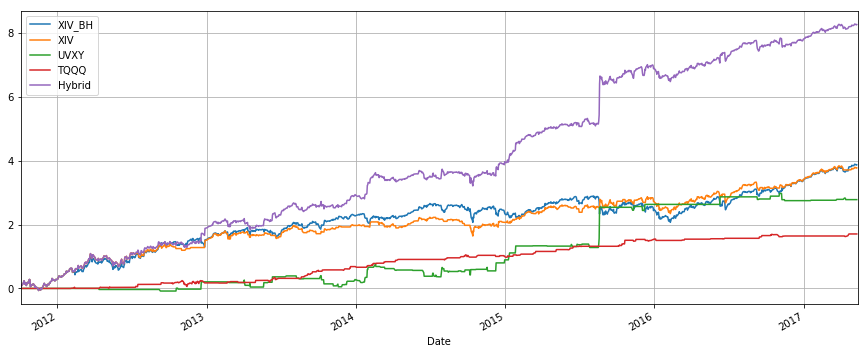

In [231]:
figsize(15,6)
pnl_zoom = pnl[-1500:]  # select period for calculation
pnl_zoom.cumsum().plot(grid=True)
#(1+pnl_zoom).cumprod().plot(grid=True)

print('Sharpe: \n', twp.sharpe(pnl_zoom))